# Rich Output

In Python, objects can declare their textual representation using the `__repr__` method. IPython expands on this idea and allows objects to declare other, rich representations including:

- HTML
- JSON
- PNG
- JPEG
- SVG
- LaTeX

A single object can declare some or all of these representations; all are handled by IPython's display system. This Notebook shows how you can use this *display system* to incorporate a broad range of content into your Notebooks.

# Basic display imports
The `display` function is a general purpose tool for displaying different representations of objects. Think of it as `print` for these rich representations.

`from IPython.display import display`    

A few points:

- Calling `display` on an object will send **all** possible representations to the Notebook.
- These representations are stored in the Notebook document.
- In general the Notebook will use the richest available representation.  
If you want to display a particular representation, there are specific functions for that:

`from IPython.display import (
    display_pretty, display_html, display_jpeg,
    display_png, display_json, display_latex, display_svg
)`  

# Images

To work with images (JPEG, PNG) use the Image class.

`from IPython.display import Image`

`i = Image(filename='../images/ipython_logo.png')`

Returning an `Image` object from an expression will automatically display it:

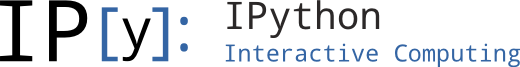

In [1]:
from IPython.display import Image
i = Image (filename='pythonImage.png')

i

An image can also be displayed from raw data or a URL

In [2]:
Image(url='http://python.org/images/python-logo.gif')

SVG images are also supported out of the box.

In [3]:
from IPython.display import SVG
SVG(filename='Python_logo_and_wordmark.svg')

## Embedded vs non-embedded Images

By default, image data is embedded in the notebook document so that the images can be viewed offline. However it is also possible to tell the `Image` class to only store a link to the image. Let's see how this works using a webcam at Berkeley.



In [4]:
from IPython.display import Image
img_url = 'http://www.lawrencehallofscience.org/static/scienceview/scienceview.berkeley.edu/html/view/view_assets/images/newview.jpg'

# by default Image data are embedded
Embed      = Image(img_url)

# if kwarg `url` is given, the embedding is assumed to be false
SoftLinked = Image(url=img_url)

# In each case, embed can be specified explicitly with the `embed` kwarg
# ForceEmbed = Image(url=img_url, embed=True)

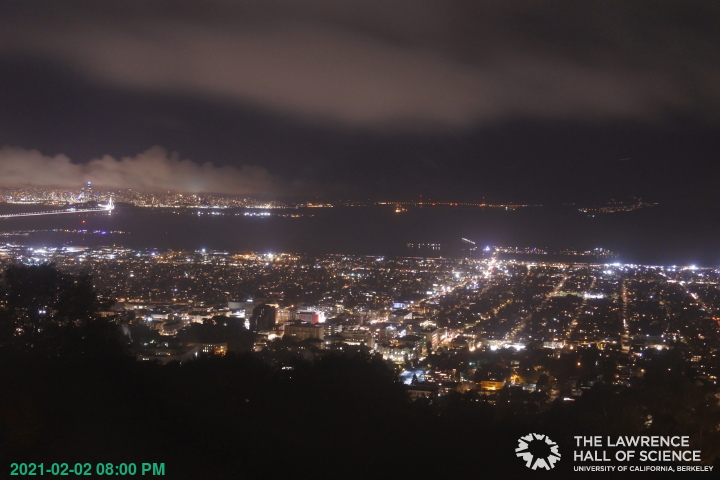

In [5]:
Embed

In [6]:
SoftLinked

In [7]:
from IPython.display import HTML

In [8]:
s = """<table>
<tr>
<th>Header 1</th>
<th>Header 2</th>
</tr>
<tr>
<td>row 1, cell 1</td>
<td>row 1, cell 2</td>
</tr>
<tr>
<td>row 2, cell 1</td>
<td>row 2, cell 2</td>
</tr>
</table>"""

In [9]:
h = HTML(s)

In [10]:
display(h)

Header 1,Header 2
"row 1, cell 1","row 1, cell 2"
"row 2, cell 1","row 2, cell 2"


In [11]:
%%html
<table>
<tr>
<th>Header 1</th>
<th>Header 2</th>
</tr>
<tr>
<td>row 1, cell 1</td>
<td>row 1, cell 2</td>
</tr>
<tr>
<td>row 2, cell 1</td>
<td>row 2, cell 2</td>
</tr>
</table>

Header 1,Header 2
"row 1, cell 1","row 1, cell 2"
"row 2, cell 1","row 2, cell 2"


In [12]:
from IPython.display import Javascript

In [13]:
js = Javascript('alert("hi")');

In [14]:
display(js)

<IPython.core.display.Javascript object>

In [15]:
Javascript(
    """$.getScript('//cdnjs.cloudflare.com/ajax/libs/d3/3.2.2/d3.v3.min.js')"""
)

<IPython.core.display.Javascript object>

In [16]:
%%html
<style type="text/css">

circle {
  fill: rgb(31, 119, 180);
  fill-opacity: .25;
  stroke: rgb(31, 119, 180);
  stroke-width: 1px;
}

.leaf circle {
  fill: #ff7f0e;
  fill-opacity: 1;
}

text {
  font: 10px sans-serif;
}

</style>

In [17]:
%%javascript

// element is the jQuery element we will append to
var e = element.get(0);
    
var diameter = 600,
    format = d3.format(",d");

var pack = d3.layout.pack()
    .size([diameter - 4, diameter - 4])
    .value(function(d) { return d.size; });

var svg = d3.select(e).append("svg")
    .attr("width", diameter)
    .attr("height", diameter)
  .append("g")
    .attr("transform", "translate(2,2)");

d3.json("data/flare.json", function(error, root) {
  var node = svg.datum(root).selectAll(".node")
      .data(pack.nodes)
    .enter().append("g")
      .attr("class", function(d) { return d.children ? "node" : "leaf node"; })
      .attr("transform", function(d) { return "translate(" + d.x + "," + d.y + ")"; });

  node.append("title")
      .text(function(d) { return d.name + (d.children ? "" : ": " + format(d.size)); });

  node.append("circle")
      .attr("r", function(d) { return d.r; });

  node.filter(function(d) { return !d.children; }).append("text")
      .attr("dy", ".3em")
      .style("text-anchor", "middle")
      .text(function(d) { return d.name.substring(0, d.r / 3); });
});

d3.select(self.frameElement).style("height", diameter + "px");

<IPython.core.display.Javascript object>

In [18]:
from IPython.display import Audio
Audio(url="https://static1.squarespace.com/static/562921c2e4b0889aaedb4e2e/t/5f79cc2424f75f5a9dabc5da/1601818490759/26+Satisfied.mp3/original/26+Satisfied.mp3")

In [11]:
import numpy as np
max_time = 3
f1 = 220.0
f2 = 224.0
rate = 8000
L = 3
blahblah = np.linspace(0,L,rate*L)
signal = np.sin(2*np.pi*f1*blahblah) + np.sin(2*np.pi*f2*blahblah)

Audio(data=signal, rate=rate)


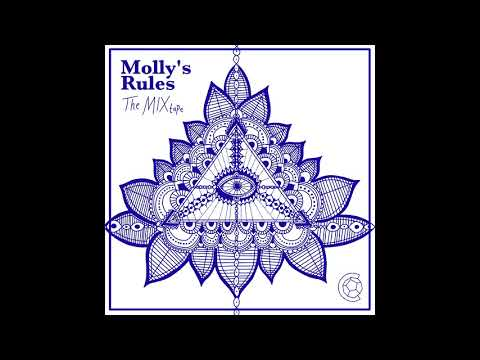

In [19]:
from IPython.display import YouTubeVideo
YouTubeVideo('HNhH1o3S-K4')

In [22]:
from IPython.display import IFrame
IFrame('https://www.willcrosswait.com/cantata/2018/2/23/vox-machina-an-exandrian-musical', width='100%', height=800)

In [23]:
from IPython.display import FileLink, FileLinks
FileLinks('.')

./
  creditCard.py
  easy.txt
  hard.txt
  hello.py
  jupNoteClone.ipynb
  jupTest.ipynb
  medium.txt
  pythonImage.png
  Python_logo_and_wordmark.svg
  stupidEasy.txt
  tempCodeRunnerFile.py
  test.py
  wordGame dict version.py
  wordGame.py
  wordGameOriginal.py
  wordGameSuperThin.py
  wordList.json
.\.git/
  COMMIT_EDITMSG
  config
  description
  HEAD
  index
.\.git\hooks/
  applypatch-msg.sample
  commit-msg.sample
  fsmonitor-watchman.sample
  post-update.sample
  pre-applypatch.sample
  pre-commit.sample
  pre-push.sample
  pre-rebase.sample
  pre-receive.sample
  prepare-commit-msg.sample
  update.sample
.\.git\info/
  exclude
.\.git\logs/
  HEAD
.\.git\logs\refs\heads/
  master
.\.git\logs\refs\remotes\origin/
  master
.\.git\objects\02/
  80486a6ca049c4381fbe3002d0ebc612e3de7d
.\.git\objects\10/
  082f68f5fae5db45e10e5acf7b29e2b0efb0a0
.\.git\objects\11/
  6eaac31119f87d269dabbab4aaae4f8bee92e0
.\.git\objects\13/
  74dd38c38be2fded89320927d187a4b443a20e
  b8549bc352621d96f47c50f35627b8e897fc61
.\.git\objects\19/
  503d028a346f94fa04b1bd4d17a8d8654319d5
  cec5d129e960a2af2003f62f518e18267707ce
.\.git\objects\1a/
  841e9385554bebd1a0af6209e7144dd753aafc
.\.git\objects\1d/
  efa020eab56ee2b590d60915b1587aa0589e38
.\.git\objects\34/
  a1ec13a42815dfa5a82ace63b9a627b5ca0028
.\.git\objects\41/
  9e03ad0c9890fe1c7fc7f90175713169b3b411
.\.git\objects\42/
  aa7e9cd3fce29621a504ea8447092cc552d72b
.\.git\objects\46/
  f6ea32be441622f35991e87753bf47d64d0645
.\.git\objects\47/
  9a03fb4269f2a57a0348b420545e484f057d4f
.\.git\objects\4a/
  3684bed9d0c3024b25704af7065c9fa7667e0e
.\.git\objects\4d/
  6ab349086ae14ae7c6932986dd076cf3799783
  de7cf425c1f52d016dffac7a99df84677adae2
.\.git\objects\50/
  59c895c7efbb288afa471f9ac0ac2a7f142d8c
  cc8d4db0bd086917ee4c0b06aff3ec0f2916ce
.\.git\objects\58/
  a37b7a3e95e9e18c2fa6c835a97b47484e5a83
.\.git\objects\5c/
  20b2a69dde04881759d7ffdfd2534b85a6d00c
  e1d7c684ee0f5276d9b6539d7f3870becf014f
.\.git\objects\5d/
  9acc7b815bd8451e6d7077c9ae59f5ce54711a
.\.git\objects\5f/
  43d795f130819180624cf822a5f5e78fdb3b33
.\.git\objects\66/
  a03f419f3d3e0c4322bc1fa18b66e94008a37b
.\.git\objects\68/
  80bdcf6216d7a3e97d76e7d98059cff6b4702f
.\.git\objects\69/
  75b9a97c8a81b4b7c67440e83a4220e7f7a8d9
.\.git\objects\77/
  941355aaf421dfff0c9fcab4453a9e0f1f3df3
.\.git\objects\84/
  ad402f31e340bb64c4e0f777e8f9487859a6a4
.\.git\objects\88/
  3a365abbee5e977c3ee98584678255f0b6292f
.\.git\objects\8a/
  f37eabd228b75ea306a459056329e54f3d6b11
.\.git\objects\92/
  7a366952fd382b86cff689771d4246bd3e9060
.\.git\objects\98/
  ff2e4f0644c55f74ab5e376f26bf8f29c6123f
.\.git\objects\9d/
  d65f4100643cf3af53376b2061c9d2cb964802
.\.git\objects\9e/
  8af4a672aa15582aed0172367d5091bfb0e97d
.\.git\objects\a1/
  fc3fbc25b910f5b634e9b387bca4959f059cb9
.\.git\objects\a6/
  63905cbed8b2add7c24be75d887c176f551057
.\.git\objects\a7/
  12f662d70053d9ffdf06373cf91662ee978317
.\.git\objects\aa/
  a6f167abf4ab18f0fd618ab4a3f5e8b59050d2
.\.git\objects\ac/
  22213edf3600c6a4d69ada842bac95c0b5f8eb
.\.git\objects\b5/
  dd7c0aab760532a3215f57a1fc53a70ca41a9d
.\.git\objects\c8/
  62eb7b4fe7792913128f7dd5a9ee67e77b48c4
.\.git\objects\ca/
  73312f87d062908ab368b7a941796a220632eb
  808e3b2483da9c23e28fe0b35dabf474dcd6ff
.\.git\objects\ce/
  47b771f4fdb0c612745ca4b7c36695f3853f7c
.\.git\objects\d0/
  a6345638b8feddc46663f8d57a2d757bb5e8a2
.\.git\objects\e9/
  bdce3941580ff04aaf32d2eb2fb1fe93685bde
.\.git\objects\ef/
  d652ade75b0975fc33754fe1e7fd19f7458feb
.\.git\objects\f1/
  67a91856f2962c04c0c8728485e67b53103996
.\.git\objects\ff/
  1ec03935100e15651294c6aba88f2440b6d4b6
.\.git\refs\heads/
  master
.\.git\refs\remotes\origin/
  master
.\.vscode/
  settings.json
.\__pycache__/
  random.cpython-39.pyc
.\anagram/
  anagram.py
  dictionary_data.json
.\pythonProblems/
  concatDict.py
  listCleaning.py
  matchString.py
  mostCommon.py
  sumList.py
  tempCodeRunnerFile.py
  uniqueWords.py